# All rent - Ensemble methods for classification

**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Uploadind the data**

In [4]:
rtdf = pd.read_csv('DS2_C5_S7_AllRent_Data_Challenge.csv')

In [3]:
rtdf.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


In [4]:
rtdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9871 non-null   int64  
 1   bathrooms        9871 non-null   float64
 2   bedrooms         9871 non-null   int64  
 3   building_id      9871 non-null   object 
 4   created          9871 non-null   object 
 5   description      9585 non-null   object 
 6   display_address  9837 non-null   object 
 7   features         9871 non-null   object 
 8   latitude         9871 non-null   float64
 9   listing_id       9871 non-null   int64  
 10  longitude        9871 non-null   float64
 11  manager_id       9871 non-null   object 
 12  photos           9871 non-null   object 
 13  price            9871 non-null   int64  
 14  street_address   9866 non-null   object 
 15  interest_level   9871 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


In [5]:
rtdf.isnull().sum()

Unnamed: 0           0
bathrooms            0
bedrooms             0
building_id          0
created              0
description        286
display_address     34
features             0
latitude             0
listing_id           0
longitude            0
manager_id           0
photos               0
price                0
street_address       5
interest_level       0
dtype: int64

In [6]:
rtdf.shape

(9871, 16)

In [7]:
rtdf.duplicated().sum()

0

In [8]:
rtdf['Month']=pd.DatetimeIndex(rtdf.created).month

In [9]:
rtdf['Day']=pd.DatetimeIndex(rtdf.created).day

In [10]:
rtdf['Total_features']=rtdf.features.apply(len)

In [11]:
rtdf['Total_photos']=rtdf.photos.apply(len)

In [12]:
rtdf.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,Month,Day,Total_features,Total_photos
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high,4,4,180,385
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high,4,21,65,231
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high,5,14,44,539
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high,5,6,66,308
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high,5,26,139,693


In [13]:
rtdf.drop_duplicates()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,Month,Day,Total_features,Total_photos
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high,4,4,180,385
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high,4,21,65,231
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high,5,14,44,539
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high,5,6,66,308
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high,5,26,139,693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,100591,1.0,0,cd6e0616a89b2687b8d7b80a1e982ac2,08-04-2016 05:59,58TH! LARGE SPACIOUS STUDIO W/ SEPARATE KITCHE...,East 58th Street,"['Pre-War', 'Dishwasher', 'Hardwood Floors', '...",40.7590,6844961,-73.9621,fc6e39fa6d54cfbc0109950411df29ca,['https://photos.renthop.com/2/6844961_5b045ca...,2000,401 East 58th Street,medium,8,4,54,308
9867,86449,1.0,2,27e0ae0427a5150191c73831eb901ab0,13-04-2016 15:40,Beautiful Renovated Large True 2 bedrrom apart...,EAST 11 TH ST,"['Cats Allowed', 'Private Outdoor Space', 'Dog...",40.7187,6868922,-73.9919,3e0c28a1f4b9c11b809ff21dbb920b5c,['https://photos.renthop.com/2/6868922_d14a762...,3590,EAST 11 TH ST,medium,4,13,80,308
9868,44736,1.0,1,d843d07dfbd498625ffd8d9e6078745e,12-05-2016 05:41,Great Deal that won't last!Become a lucky resi...,Amsterdam Avenue,"['Elevator', 'Furnished', 'Laundry in Unit', '...",40.8002,7002179,-73.9656,4c168ba2cf07ab943c98cada6160d2d1,['https://photos.renthop.com/2/7002179_2c2510f...,3000,933 Amsterdam Avenue,medium,12,5,73,308
9869,100906,1.0,0,b401b080b557697e91b2d19b5a22fac9,21-04-2016 04:56,Stunning West Village apartment available for ...,W 13 Street,"['Elevator', 'Loft', 'Hardwood Floors', 'Dogs ...",40.7383,6906479,-74.0006,4414b04ea8115e64639b64b73737036a,['https://photos.renthop.com/2/6906479_a898cc6...,2525,205 W 13 Street,medium,4,21,71,462


In [14]:
# # dropping col
rtdf.drop(columns=['description','display_address','Unnamed: 0','street_address','created','manager_id','listing_id','features','photos'],inplace=True)

In [15]:
rtdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       9871 non-null   float64
 1   bedrooms        9871 non-null   int64  
 2   building_id     9871 non-null   object 
 3   latitude        9871 non-null   float64
 4   longitude       9871 non-null   float64
 5   price           9871 non-null   int64  
 6   interest_level  9871 non-null   object 
 7   Month           9871 non-null   int64  
 8   Day             9871 non-null   int64  
 9   Total_features  9871 non-null   int64  
 10  Total_photos    9871 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 848.4+ KB


In [16]:
rtdf.drop('building_id',axis=1,inplace=True)

In [17]:
rtdf.head()

,bathrooms,bedrooms,latitude,longitude,price,interest_level,Month,Day,Total_features,Total_photos
0,1.0,0,40.7672,-73.9802,2800,high,4,4,180,385
1,1.0,1,40.7483,-73.9741,2100,high,4,21,65,231
2,1.0,1,40.7399,-73.9812,3000,high,5,14,44,539
3,1.0,2,40.7530,-73.9958,3000,high,5,6,66,308
4,1.0,2,40.7695,-73.9603,3300,high,5,26,139,693


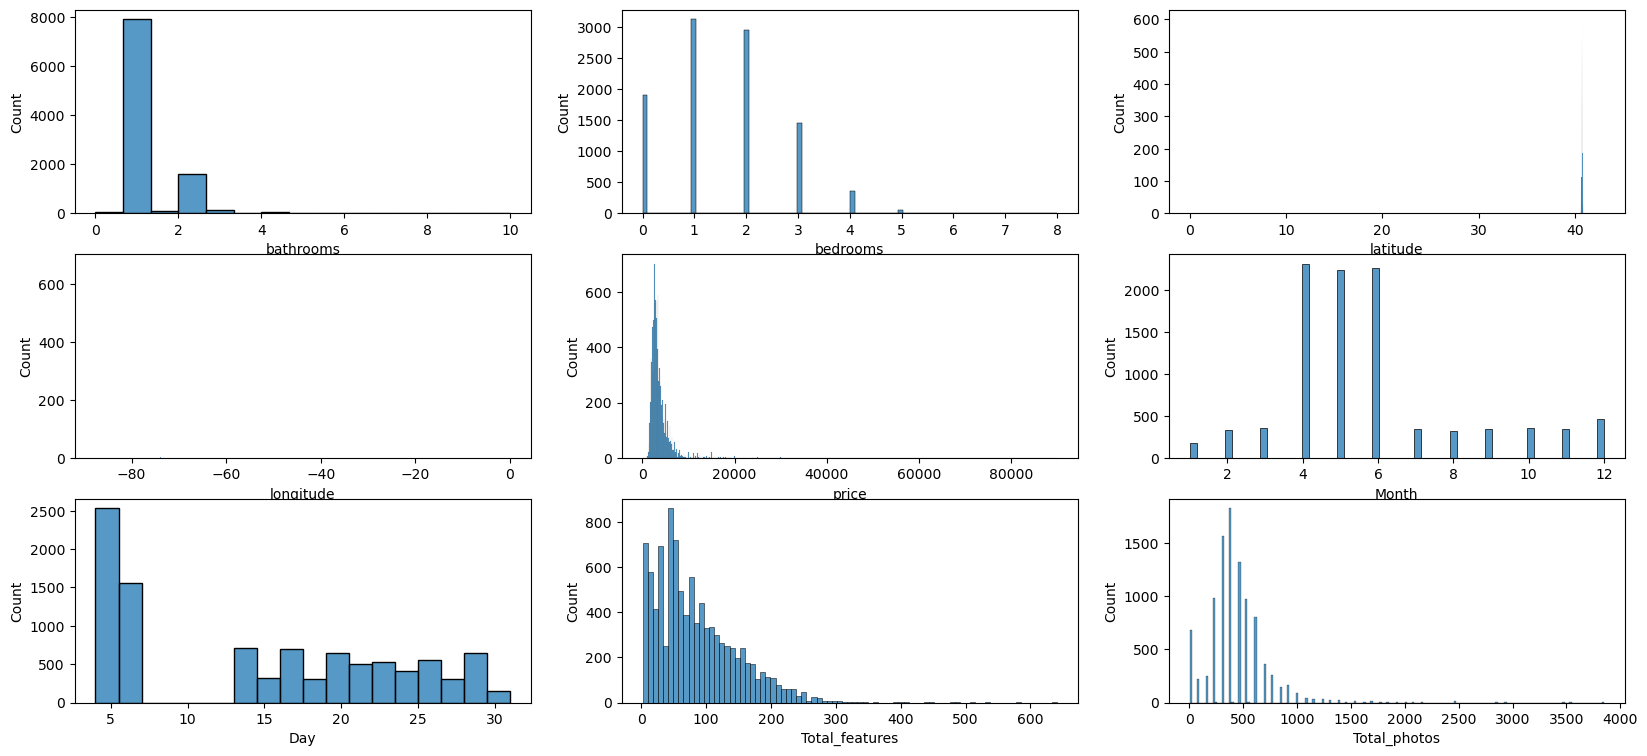

In [18]:
num_col = rtdf.select_dtypes(["int64","float64"])

fig,axs=plt.subplots(3,3,figsize=(20,9))
axs=axs.ravel()

count=0
for i in num_col:
    sns.histplot(x=i,data=rtdf,ax=axs[count])
    count+=1

<AxesSubplot:xlabel='price'>

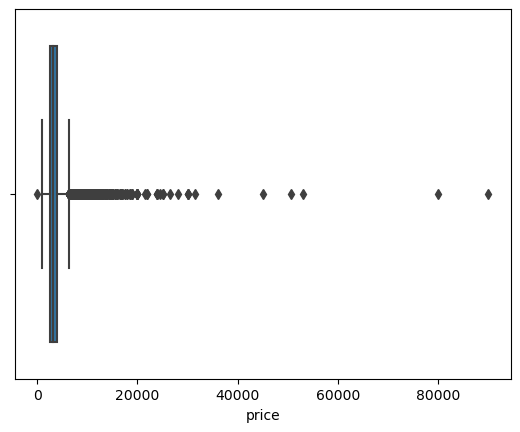

In [19]:
sns.boxplot('price',data=rtdf)

<AxesSubplot:xlabel='bedrooms'>

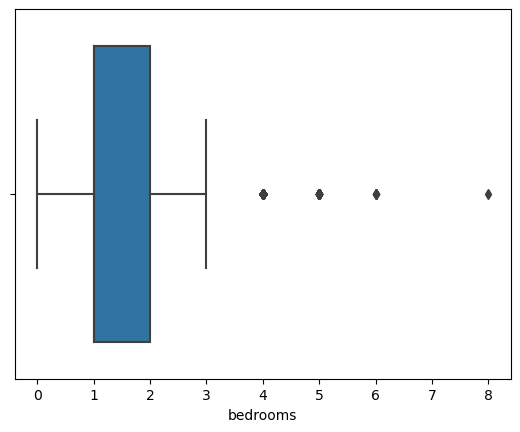

In [20]:
sns.boxplot('bedrooms',data=rtdf)

<AxesSubplot:xlabel='bathrooms'>

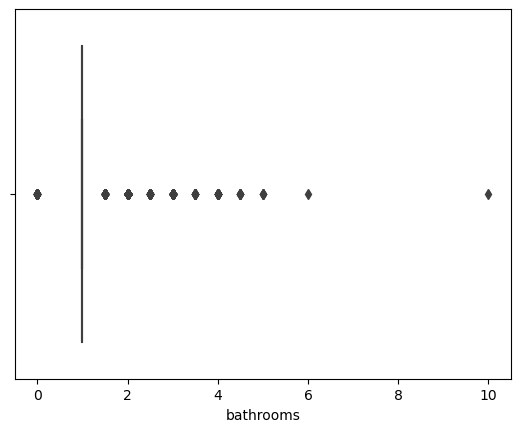

In [21]:
sns.boxplot('bathrooms',data=rtdf)

In [22]:
rtdf=rtdf[(rtdf.bathrooms>0) & (rtdf.bathrooms<8)]


In [23]:
# change bathroom and bedroom as category (round for bathrooms)

<AxesSubplot:xlabel='bathrooms'>

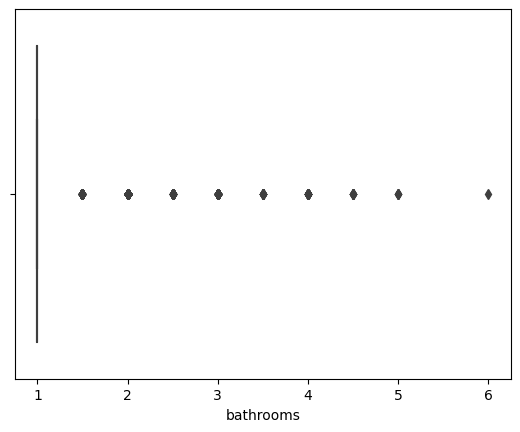

In [24]:
sns.boxplot('bathrooms',data=rtdf)

In [25]:
def bar_pie(*s):
    for col in s:
        value_counts=rtdf[col].value_counts()
        fig,ax=plt.subplots(1,2,figsize=(10,2))
        sns.barplot(value_counts.index,value_counts.values,ax=ax[0])
        ax[0].set_title(f"count of {col} in each type")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")
        ax[0].set_xticks(ticks=range(len(value_counts.index)),labels=value_counts.index,rotation=90)
        
        per=rtdf[col].value_counts(normalize=True)*100
        ax[1].pie(per.values,labels=per.index,autopct="%1.1f%%")
        ax[1].set_title(f"percentage of {col}")

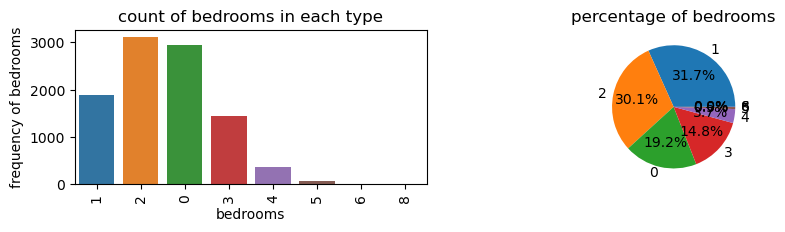

In [26]:
bar_pie("bedrooms")

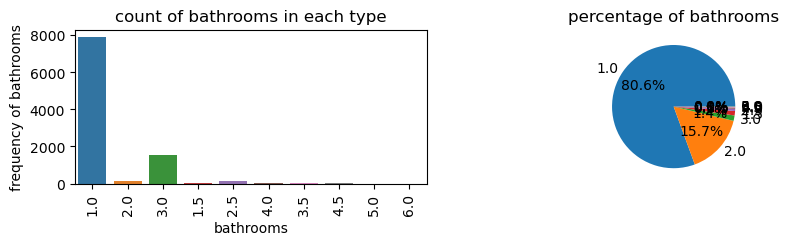

In [27]:
bar_pie("bathrooms")

Text(0.5, 1.0, 'Price by Bedrooms')

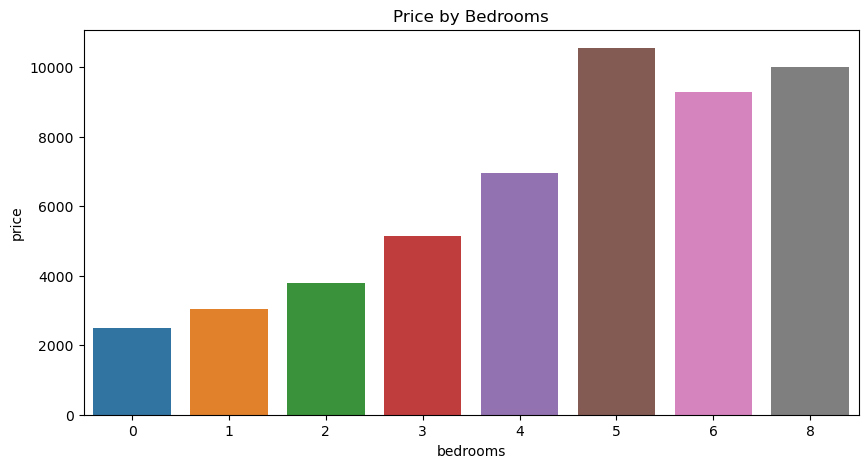

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(y="price",x="bedrooms",data=rtdf,ci=None)
plt.title("Price by Bedrooms")

For 5 no. of bedrooms Price is maximum.

Text(0.5, 1.0, 'Price by Bathrooms')

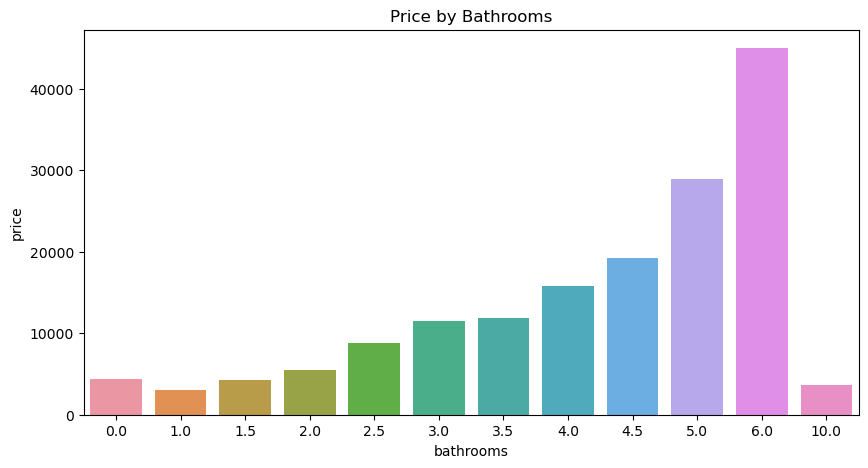

In [5]:
plt.figure(figsize=(10,5))
sns.barplot(y="price",x="bathrooms",data=rtdf,ci=None)
plt.title("Price by Bathrooms")


6 no. of bathrooms have the highest price.

Text(0.5, 1.0, 'price by the Interest levels')

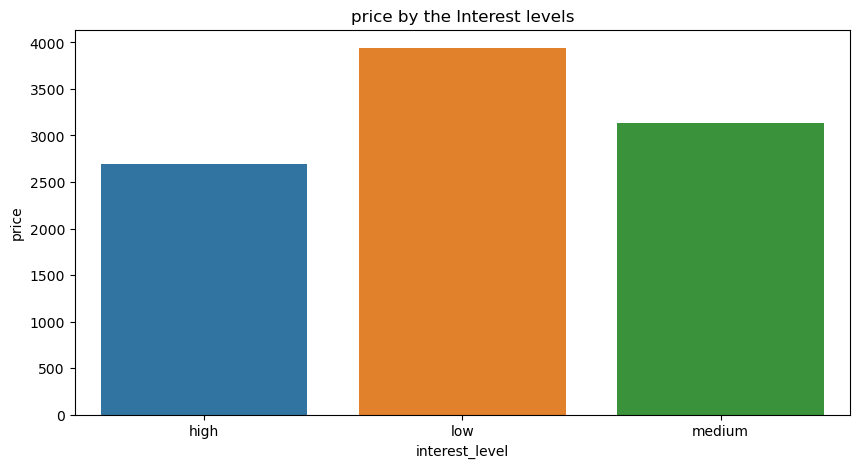

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(y="price",x="interest_level",data=rtdf,ci=None)
plt.title("price by the Interest levels")

Price is highest for low interest level

Text(0.5, 1.0, 'Bedrooms by the Interest Levels')

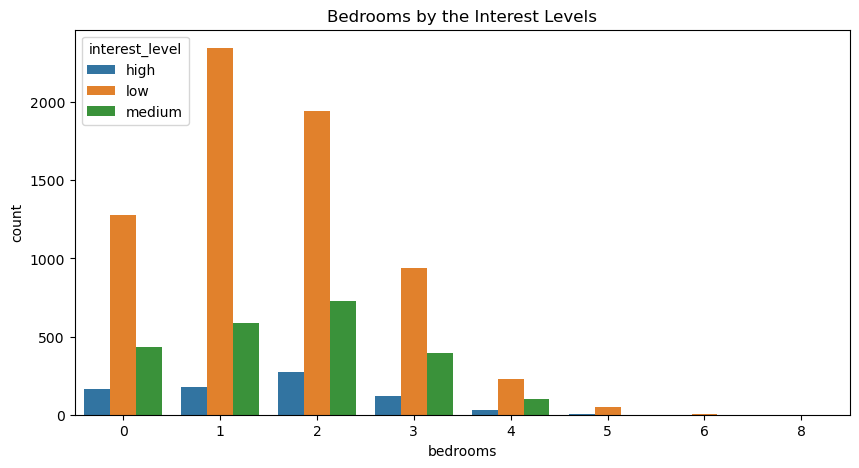

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x="bedrooms",hue="interest_level",data=rtdf)
plt.title("Bedrooms by the Interest Levels")
#stacked

Bedroom with 1 have the highest interest level of low.

Text(0.5, 1.0, 'Bathrooms by the Interest Levels')

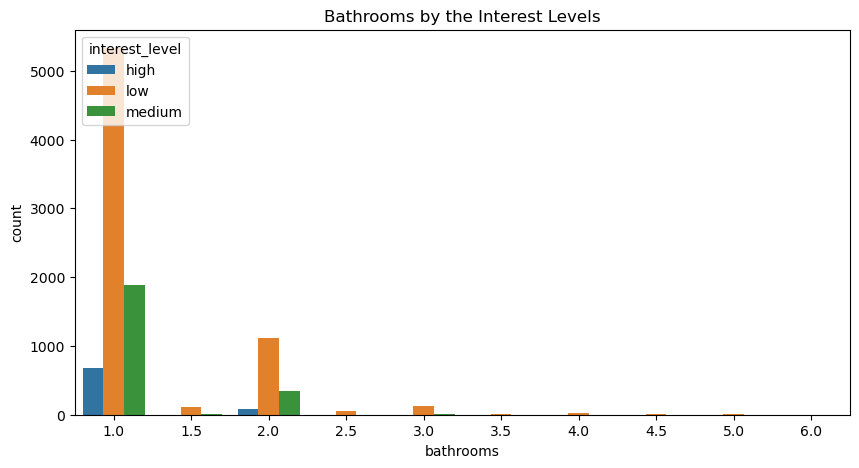

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x="bathrooms",hue="interest_level",data=rtdf)
plt.title("Bathrooms by the Interest Levels")

With batrooms 1 have the lowest interest level.

Text(0.5, 1.0, 'Total photos by the Interest Levels')

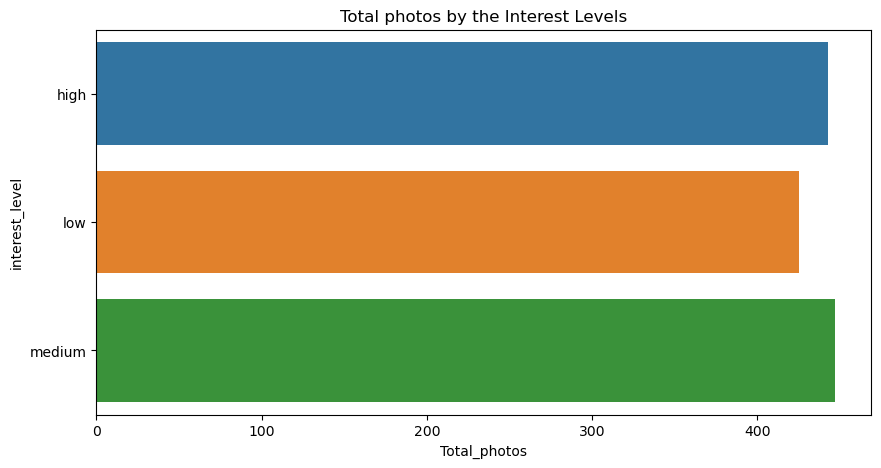

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x="Total_photos",y="interest_level",data=rtdf,ci=None)
plt.title("Total photos by the Interest Levels")

The no. of photos are maximum of people with interest level of high and medium.

Text(0.5, 1.0, 'Price in Each month')

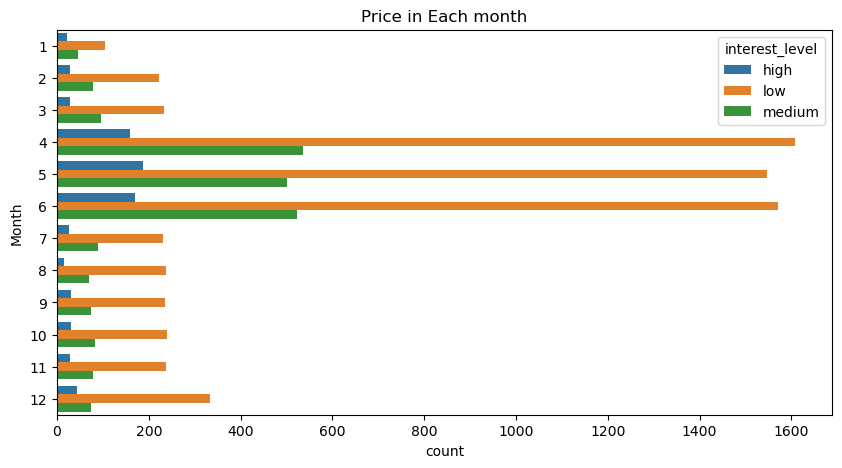

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(y="Month",hue="interest_level",data=rtdf)
plt.title("Price in Each month")

For the Month of 4,5 and 6 the interest level is low.

In [36]:
# changing interest to categories

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [38]:
cat_col = ['interest_level']
rtdf[cat_col] = rtdf[cat_col].astype('category')

In [39]:
rtdf['bathrooms'] = rtdf['bathrooms'].astype('int64')

In [40]:
rtdf

,bathrooms,bedrooms,latitude,longitude,price,interest_level,Month,Day,Total_features,Total_photos
0,1,0,40.7672,-73.9802,2800,high,4,4,180,385
1,1,1,40.7483,-73.9741,2100,high,4,21,65,231
2,1,1,40.7399,-73.9812,3000,high,5,14,44,539
3,1,2,40.7530,-73.9958,3000,high,5,6,66,308
4,1,2,40.7695,-73.9603,3300,high,5,26,139,693
...,...,...,...,...,...,...,...,...,...,...
9866,1,0,40.7590,-73.9621,2000,medium,8,4,54,308
9867,1,2,40.7187,-73.9919,3590,medium,4,13,80,308
9868,1,1,40.8002,-73.9656,3000,medium,12,5,73,308
9869,1,0,40.7383,-74.0006,2525,medium,4,21,71,462


In [41]:
rtdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9811 entries, 0 to 9870
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   bathrooms       9811 non-null   int64   
 1   bedrooms        9811 non-null   int64   
 2   latitude        9811 non-null   float64 
 3   longitude       9811 non-null   float64 
 4   price           9811 non-null   int64   
 5   interest_level  9811 non-null   category
 6   Month           9811 non-null   int64   
 7   Day             9811 non-null   int64   
 8   Total_features  9811 non-null   int64   
 9   Total_photos    9811 non-null   int64   
dtypes: category(1), float64(2), int64(7)
memory usage: 776.2 KB


In [42]:
label_encoder =preprocessing.LabelEncoder()

for col in cat_col:
    rtdf[col] = label_encoder.fit_transform(rtdf[col])

In [43]:
corr_mat=rtdf.corr()

In [44]:
corr_mat

,bathrooms,bedrooms,latitude,longitude,price,interest_level,Month,Day,Total_features,Total_photos
bathrooms,1.000000,0.531855,0.008177,-0.000922,0.649292,-0.015729,0.003968,0.016240,0.224121,0.142339
bedrooms,0.531855,1.000000,0.014995,-0.008234,0.443194,0.024285,0.001475,0.016770,0.125675,0.161788
latitude,0.008177,0.014995,1.000000,-0.967427,0.006733,0.001204,0.005348,-0.001841,0.009093,0.002758
longitude,-0.000922,-0.008234,-0.967427,1.000000,-0.009420,-0.003517,-0.008266,0.007734,-0.019363,-0.002201
price,0.649292,0.443194,0.006733,-0.009420,1.000000,-0.033379,0.000521,-0.002579,0.220243,0.116246
interest_level,-0.015729,0.024285,0.001204,-0.003517,-0.033379,1.000000,-0.024298,0.020552,0.049931,0.017961
Month,0.003968,0.001475,0.005348,-0.008266,0.000521,-0.024298,1.000000,-0.348456,-0.034877,0.026634
Day,0.016240,0.016770,-0.001841,0.007734,-0.002579,0.020552,-0.348456,1.000000,0.013794,-0.008758
Total_features,0.224121,0.125675,0.009093,-0.019363,0.220243,0.049931,-0.034877,0.013794,1.000000,0.166146
Total_photos,0.142339,0.161788,0.002758,-0.002201,0.116246,0.017961,0.026634,-0.008758,0.166146,1.000000


<AxesSubplot:>

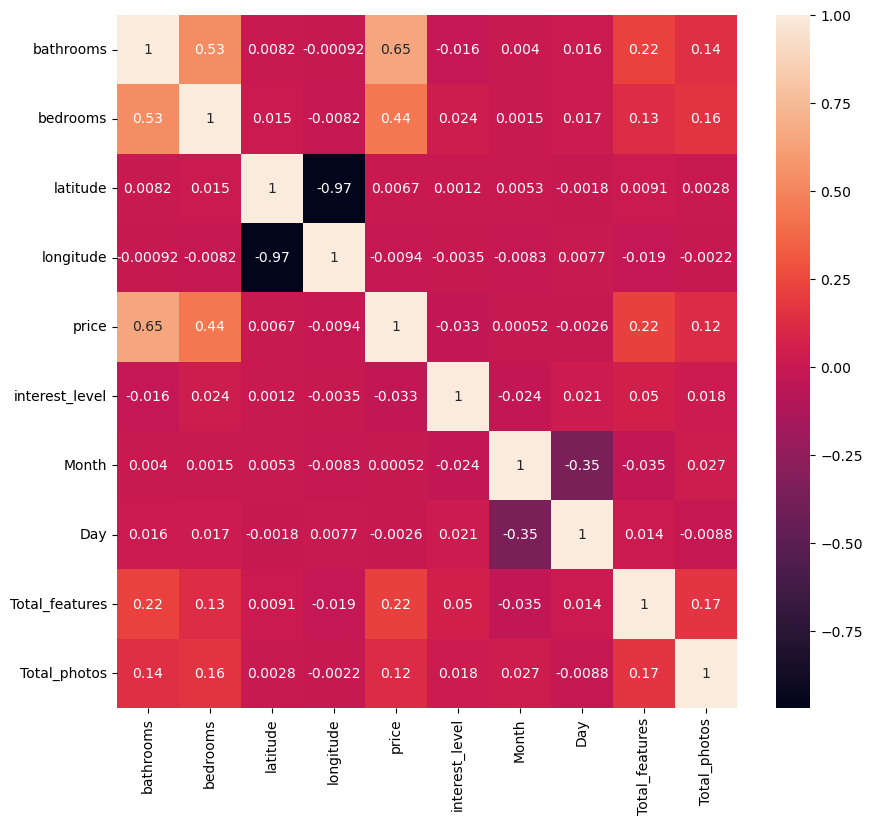

In [45]:
plt.figure(figsize=(10,9))
sns.heatmap(corr_mat,annot=True)

# splitting and Scaling

In [46]:
X=rtdf.drop(['interest_level'],axis=1)
y=rtdf['interest_level']

scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[-0.43662764, -1.39015593,  0.04839836, ..., -1.18791992,
         1.52266248, -0.17068251],
       [-0.43662764, -0.48620446,  0.00294132, ...,  0.74962628,
        -0.29170529, -0.7356694 ],
       [-0.43662764, -0.48620446, -0.01726181, ..., -0.04818686,
        -0.62302462,  0.39430438],
       ...,
       [-0.43662764, -0.48620446,  0.12776779, ..., -1.07394661,
        -0.1654884 , -0.45317595],
       [-0.43662764, -1.39015593, -0.02111002, ...,  0.74962628,
        -0.19704263,  0.11181093],
       [-0.43662764, -1.39015593, -0.01918592, ...,  1.77538603,
         2.64283737,  0.11181093]])

In [47]:
# from sklearn.model_selection import train_test_split

In [48]:
# X_train, X_test,y_train, y_test=train_test_split(scaled_X,y,test_size=0.3,random_state=42)

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
# label binarizer

In [50]:
# kfold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [51]:
kf=KFold(n_splits=5,shuffle=True)

In [52]:
# for i in range(1,15):
score=cross_val_score(LogisticRegression(n_jobs=-1,max_iter=10,random_state=42),scaled_X,y,cv=kf,scoring="accuracy")
print(np.mean(score))

0.6887167439631137


In [54]:
log_model=LogisticRegression(n_jobs=-1,max_iter=10)
lg =[]
for train_data, test_data in kf.split(rtdf):                                             
    train,test=rtdf.iloc[train_data],rtdf.iloc[test_data]
    X_train=train.drop(columns=['interest_level'],axis=1)
    y_train=train['interest_level']
    X_test=test.drop(columns=['interest_level'])
    y_test=test['interest_level']
    log_model.fit(X_train,y_train)
    y_pred = log_model.predict(X_test)
    lg.append(accuracy_score(y_test,y_pred))
    #print("mse",mean_squared_error(y_test, y_pred, squared=False))
#     print("f1score", f1_score(y_test,y_pred,average='micro'))
#     print("recall scr", recall_score(y_test,y_pred,average='micro'))
#     print("precision", precision_score(y_test,y_pred,average='micro'))          # when only 2 classes avg=binary
    print("accuracy" , accuracy_score(y_test,y_pred))
    #print("avg pri", average_precision_score(y_test,y_pred))
    print()
        
avg_scrlg = np.mean(accuracy_score(y_test,y_pred))

print("the average accuracy is ",avg_scrlg)     

accuracy 0.6800815078960775

accuracy 0.7140672782874617

accuracy 0.6890927624872579

accuracy 0.700815494393476

accuracy 0.6788990825688074

the average accuracy is  0.6788990825688074


In [55]:
log_model.score(X_train,y_train)

0.696012230857434

In [56]:
log_model.score(X_test,y_test)

0.6788990825688074

# Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB 

In [58]:
# for i in range(1,15):
score=cross_val_score(GaussianNB(),scaled_X,y,cv=kf,scoring="accuracy")
print(np.mean(score))

0.2931405310164652


In [59]:
nb_model=GaussianNB()
lnb =[]
for train_data, test_data in kf.split(rtdf):
    train,test=rtdf.iloc[train_data],rtdf.iloc[test_data]
    X_train=train.drop(columns=['interest_level'],axis=1)
    y_train=train['interest_level']
    X_test=test.drop(columns=['interest_level'])
    y_test=test['interest_level']
    nb_model.fit(X_train,y_train)
    y_pred = nb_model.predict(X_test)
    lnb.append(accuracy_score(y_test,y_pred))
    #print("rmse",mean_squared_error(y_test, y_pred, squared=False))
    #print("f1score", f1_score(y_test,y_pred))
    #print("precision", precision_score(y_test,y_pred))          
    print("accuracy" , accuracy_score(y_test,y_pred))
    print()
    
avg_scrnb = np.mean(accuracy_score(y_test,y_pred))

print("the average accuracy is ",avg_scrnb)     

accuracy 0.26795720835455933

accuracy 0.2793068297655454

accuracy 0.4164118246687054

accuracy 0.29918450560652393

accuracy 0.31753312945973494

the average accuracy is  0.31753312945973494


In [60]:
nb_model.score(X_train,y_train)

0.2862785068161549

In [61]:
nb_model.score(X_test,y_test)

0.31753312945973494

# Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [63]:
for i in range(1,15):
    score=cross_val_score(DecisionTreeClassifier(max_depth=i,min_samples_split=5,min_samples_leaf=10,random_state=42),scaled_X,y,cv=kf,scoring="accuracy")
    print(np.mean(score))

0.6928939717079944
0.6923852743647385
0.6958529430550817
0.6965656178548822
0.6951391777444393
0.6979911751708336
0.6974812834585602
0.6945281281692971
0.6993164054893201
0.6882066445344897
0.679848554008588
0.6830090621450972
0.6683295399134757
0.6764850031391133


In [64]:
dt_model=DecisionTreeClassifier(max_depth=6,min_samples_split=5,random_state=42)
ldt =[]
for train_data, test_data in kf.split(rtdf):
    train,test=rtdf.iloc[train_data],rtdf.iloc[test_data]
    X_train=train.drop(columns=['interest_level'],axis=1)
    y_train=train['interest_level']
    X_test=test.drop(columns=['interest_level'])
    y_test=test['interest_level']
    dt_model.fit(X_train,y_train)
    y_pred = dt_model.predict(X_test)
    ldt.append(accuracy_score(y_test,y_pred))
    #print("rmse",mean_squared_error(y_test, y_pred, squared=False))
    #print("f1score", f1_score(y_test,y_pred))
    #print("precision", precision_score(y_test,y_pred))          
    print("accuracy" , accuracy_score(y_test,y_pred))
    print()

avg_scrdt = np.mean(accuracy_score(y_test,y_pred))

print("the average accuracy is ",avg_scrdt)      

accuracy 0.6902699949057565

accuracy 0.7054026503567788

accuracy 0.7018348623853211

accuracy 0.6865443425076453

accuracy 0.7003058103975535

the average accuracy is  0.7003058103975535


In [65]:
dt_model.score(X_train,y_train)

0.7115556121798955

In [66]:
dt_model.score(X_test,y_test)

0.7003058103975535

[Text(0.4697164948453608, 0.9285714285714286, 'price <= 2538.5\ngini = 0.46\nsamples = 7849\nvalue = [615, 5447, 1787]\nclass = y[1]'),
 Text(0.22938144329896906, 0.7857142857142857, 'price <= 1822.5\ngini = 0.593\nsamples = 2084\nvalue = [336, 1125, 623]\nclass = y[1]'),
 Text(0.1134020618556701, 0.6428571428571429, 'Total_features <= 39.5\ngini = 0.665\nsamples = 407\nvalue = [133, 147, 127]\nclass = y[1]'),
 Text(0.05670103092783505, 0.5, 'Month <= 17.5\ngini = 0.468\nsamples = 45\nvalue = [4, 31, 10]\nclass = y[1]'),
 Text(0.020618556701030927, 0.35714285714285715, 'longitude <= -73.989\ngini = 0.318\nsamples = 27\nvalue = [2, 22, 3]\nclass = y[1]'),
 Text(0.010309278350515464, 0.21428571428571427, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = y[1]'),
 Text(0.030927835051546393, 0.21428571428571427, 'price <= 1450.0\ngini = 0.234\nsamples = 23\nvalue = [2, 20, 1]\nclass = y[1]'),
 Text(0.020618556701030927, 0.07142857142857142, 'gini = 0.48\nsamples = 5\nvalue = [2, 3, 0]\nc

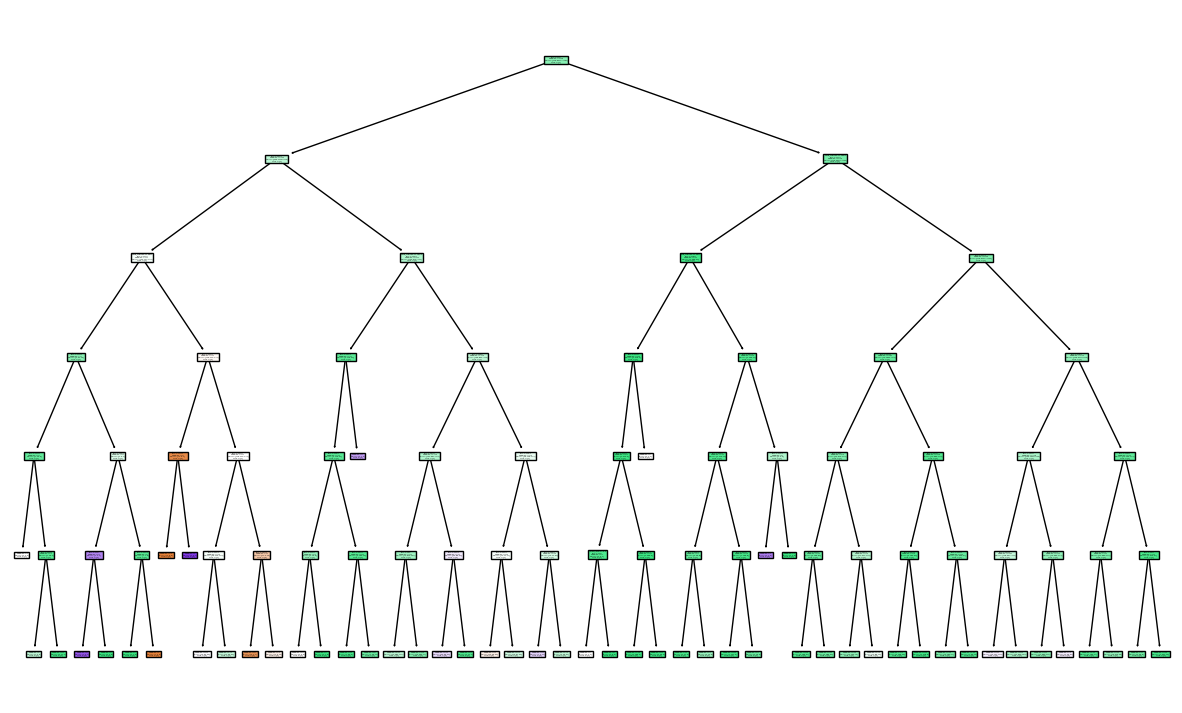

In [67]:
plt.figure(figsize=(15,9))
tree.plot_tree(dt_model,filled=True,feature_names=rtdf.columns,class_names=True)

# Random FOrest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
for i in range(1,15):
    score=cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5,min_samples_split=5,n_jobs=-1,random_state=42),scaled_X,y,cv=kf,scoring="accuracy")
    print(np.mean(score))

0.687188263195311
0.6926928503512744
0.6938135319932514
0.6962589765919251
0.6967696991696019
0.696769699169602
0.696972638044392
0.6974828932602796
0.6962599632445916
0.6971766674300243
0.6964623828285048
0.6950345925617814
0.6963601344547938
0.697279279307349


In [71]:
rm_model=RandomForestClassifier(n_estimators=8,max_depth=5,n_jobs=-1,random_state=42)
lrm=[]
for train_data, test_data in kf.split(rtdf):
    train,test=rtdf.iloc[train_data],rtdf.iloc[test_data]
    X_train=train.drop(columns=['interest_level'],axis=1)
    y_train=train['interest_level']
    X_test=test.drop(columns=['interest_level'])
    y_test=test['interest_level']
    rm_model.fit(X_train,y_train)
    y_pred = rm_model.predict(X_test)
    lrm.append(accuracy_score(y_test,y_pred))
    #print("rmse",mean_squared_error(y_test, y_pred, squared=False))
    #print("f1score", f1_score(y_test,y_pred))
    #print("precision", precision_score(y_test,y_pred))          
    print("accuracy" , accuracy_score(y_test,y_pred))
    print()
    
avg_scrm = np.mean(accuracy_score(y_test,y_pred))

print("the average accuracy is ",avg_scrm)    

accuracy 0.7050433010697912

accuracy 0.6855249745158002

accuracy 0.6987767584097859

accuracy 0.6926605504587156

accuracy 0.6941896024464832

the average accuracy is  0.6941896024464832


In [72]:
rm_model.score(X_train,y_train)

0.7011084214549624

In [73]:
rm_model.score(X_test,y_test)

0.6941896024464832

# Boosting Adaboost

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
ada=AdaBoostClassifier()

In [76]:
for i in range(1,15):
    a_score=cross_val_score(AdaBoostClassifier(n_estimators=i,learning_rate=1),scaled_X,y,cv=kf,scoring="accuracy")
    print(np.mean(a_score))

0.6928974509568714
0.692894439069784
0.6907535585705584
0.6937109720450142
0.6957489810214763
0.694934057847965
0.6961578706581442
0.6965646831313033
0.6952414261181501
0.6974821662530515
0.698502157393949
0.6967699588150404
0.7001322633864101
0.699725606700514


In [77]:
ada_model=AdaBoostClassifier(n_estimators=13,learning_rate=0.5)
la =[]
for train_data, test_data in kf.split(rtdf):
    train,test=rtdf.iloc[train_data],rtdf.iloc[test_data]
    X_train=train.drop(columns=['interest_level'],axis=1)
    y_train=train['interest_level']
    X_test=test.drop(columns=['interest_level'])
    y_test=test['interest_level']
    ada_model.fit(X_train,y_train)
    y_pred = ada_model.predict(X_test)
    la.append(accuracy_score(y_test,y_pred))
    #print("rmse",mean_squared_error(y_test, y_pred, squared=False))
    #print("f1score", f1_score(y_test,y_pred))
    #print("precision", precision_score(y_test,y_pred))          
    print("accuracy" , accuracy_score(y_test,y_pred))  # append to a list an theen acc 
    print()
    
avg_scrada = np.mean(accuracy_score(y_test,y_pred))

print("the average accuracy is ",avg_scrada)

accuracy 0.6923076923076923

accuracy 0.7043832823649337

accuracy 0.6890927624872579

accuracy 0.6926605504587156

accuracy 0.7023445463812437

the average accuracy is  0.7023445463812437


In [78]:
# list emt 

In [79]:
a_model = AdaBoostClassifier(learning_rate=0.5, n_estimators=13,random_state=42)

a_model.fit(X,y)

AdaBoostClassifier(learning_rate=0.5, n_estimators=13, random_state=42)

In [80]:
a_model.score(X_train,y_train)

0.6957574213275577

In [81]:
a_model.score(X_test,y_test)

0.7018348623853211

# Stacking

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [83]:
level1=[]
level1.append(("log",log_model))
level1.append(("knn",KNeighborsClassifier()))
level1.append(("svc",SVC()))
level1.append(("dt",dt_model))
level1.append(("rnd",rm_model))
level2=LogisticRegression() 
stack_model=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf)

In [84]:
level1

[('log', LogisticRegression(max_iter=10, n_jobs=-1)),
 ('knn', KNeighborsClassifier()),
 ('svc', SVC()),
 ('dt',
  DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=42)),
 ('rnd',
  RandomForestClassifier(max_depth=5, n_estimators=8, n_jobs=-1, random_state=42))]

In [85]:
score=cross_val_score(stack_model,scaled_X,y,scoring="accuracy",cv=kf)
print(np.mean(score))
print(score)

0.698298491511931
[0.69179827 0.70795107 0.70336391 0.69164118 0.69673802]


In [95]:
# sscore=[avg_scrlg,avg_scrnb,avg_scrdt,avg_scrm,avg_scrada,score]
score=[lg,lnb,ldt,lrm,la]

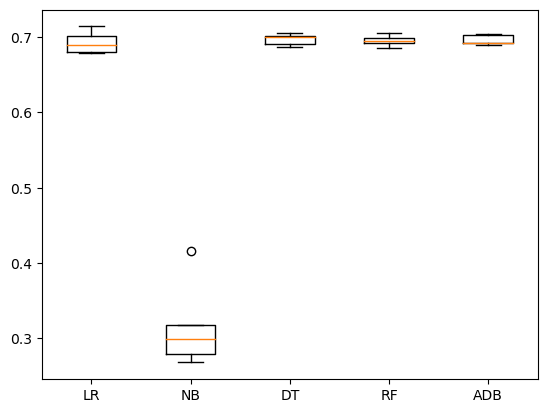

In [98]:
plt.boxplot(x=score,labels=['LR','NB','DT','RF','ADB'])
plt.show()

 Random Forest is the best model based on the accuracy score.